# Quicksort

Quicksort pertenece al conjunto de algoritmos que aplican el concepto de dividir y conquistar, así como mergesort. El proceso para "divide y venceras" consiste de tres pasos:

#### 1. Dividir
El algoritmo recibe un arreglo de elementos, llamémoslo "A". Primero particionamos el arreglo A en dos subarreglos (que quizás estén vacíos). Para particionar usamos un índice que será el pivote, llémoslo q. La idea es obtener dos arreglos

A[p...q-1] y A[q+1...A.length]

De tal forma que todos los elementos del primer arreglo A[p...q-1] sean menores o iguales a A[q].


#### 2. Conquistar
Ya que particionamos el arreglo, ahora ordenamos cada subarreglo con llamadas recursivas.

#### 3. Combinar
Como los arreglos ya están ordenados, ahora sólo necesitamos combinar, pero no necesitamos hacer más trabajo para lograr esto.

## Particionando el arreglo

La llave del algoritmo quicksort es el método para particionar el arreglo porque re-ordena el subarreglo A sin crear un nuevo arreglo. Este método recibe tres parámetros: el arreglo A, el índice inicial y el índice final.

El método consiste en tres contadores: i, p, j y r como se ve en la imagen. Comenzamos colocando un pivote en el último elemento del arreglo A[r]. Los elementos coloreados de gris claro son los que van en la primera partición, mientras que los coloreados de gris oscuro son los que van en la segunda partición. Inicializamos los contadores p en el inicio del arreglo e i en un elemento antes.

La variable j irá tomando cada valor en el arreglo. Empezamos con el primer elemento, si es menor o igual al pivote entonces le sumamos 1 a i e intercambiamos A[i] con A[j]; si es mayor, no hacemos nada. Repetimos esto para todos los elementos del arreglo y al final sólo colocamos al último elemento en su posición correcta, que será i + 1.


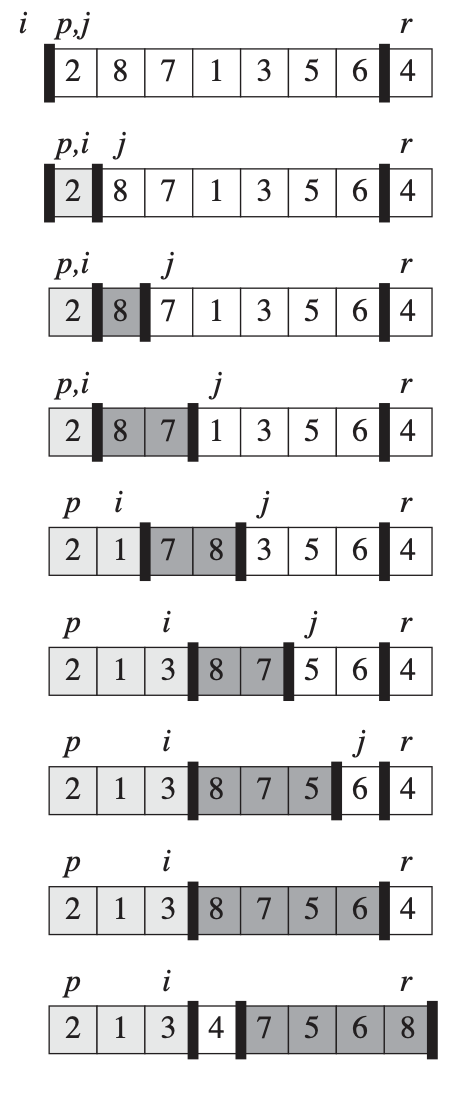

In [9]:
# Implementamos la función PARTITION
def PARTITION(A, p, r):
    x = A[r]
    i = p - 1
    
    # Aprovechamos que en python los rangos llegan a r - 1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            
            # Intercambiamos A[i] con A[j]
            A[i], A[j] = A[j], A[i]
            
    # Intercambiamos A[i + 1] con A[r]
    A[i + 1], A[r] = A[r], A[i + 1]
    
    return i + 1

### Loop invariante
Conforme se ejecuta la función, para cualquier índice k.

1. Si p <= k <= i, entonces A[k] <= x
2. Si i+1 <= k <= j-1, entonces A[k] > x
3. Si k = r, entonces A[k] = x

Es decir

1. Los elementos en A[p...i] <= pivote
2. Los elementos en A[i+1...j-1] > pivote
3. A[r] = pivote


### Prueba
1. Inicialización
Antes de que el ciclio inicie, se cumplen todas las propiedades porque el A[r] es el pivote y los subarreglos A[p...i] y A[i+1...j-1] están vacíos.

2. Mantenimiento
Mientras se ejecuta el ciclo, si A[j] <= pivote, entonces A[j] y A[i + 1] se intercambian y se incrementan los valores de i y j. Si A[j] > pivote, entonces sólo se incrementa j.

3. Finalización
Cuando el loop termina, j = r así que todos los elementos en A están particionados en uno de tres casos: A[p...i] <= pivote, A[i+1...j-1] < pivote, y A[r] = pivote.

## Quicksort

Ahora sí podemos implementar el algoritmo quicksort que recibe tres parámetros: el arreglo A, el índice inicial y el índice final. Ejecutamos mientras p sea menor a r y en cada iteración hacemos una partición y llamamos recursivamente a quicksort con los elementos a la izquierda y a la derecha de la partición.

In [10]:
def QUICKSORT(A, p, r, should_print=False):
    if p < r:
        q = PARTITION(A, p, r)
        if should_print:
            print(A)        
        QUICKSORT(A, p, q - 1, should_print)
        QUICKSORT(A, q + 1, r, should_print)

## Probando el algoritmo

Ahora probamos el algoritmo QUICKSORT con el arreglo que vimos al ejemplo, imprimiendo el arreglo en cada iteración.

In [11]:
A = [2, 8, 7, 1, 3, 5, 6, 4]
print(A)
QUICKSORT(A, 0, len(A) - 1, True)

[2, 8, 7, 1, 3, 5, 6, 4]
[2, 1, 3, 4, 7, 5, 6, 8]
[2, 1, 3, 4, 7, 5, 6, 8]
[1, 2, 3, 4, 7, 5, 6, 8]
[1, 2, 3, 4, 7, 5, 6, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


### Probando el tiempo de ejecución
Quicksort tiene un tiempo de ejecución de O(n lg(n)), así que mostraremos que se ajusta a esta gráfica probando con arreglos de distintos tamaños. Para cada tamaño crearemos 10 arreglos y promediaremos el tiempo.

In [48]:
import numpy
from matplotlib import pyplot
import time
import random

# Este método genera un arreglo de elementos aleatorios de 0 a 100
def generar_arreglo(largo):
    return [random.randint(0, 100) for x in range(0, largo)]

# Este método genera n arreglos, mide el tiempo de ejecución y lo promedia
def probar_quicksort(n, n_arreglos=1):
    arreglos = [generar_arreglo(n) for x in range(0, n_arreglos)]
    contador_tiempo_ejecucion = 0
    
    for arreglo in arreglos:
        tiempo_inicial = time.time()
        QUICKSORT(arreglo, 0, len(arreglo) - 1)
        tiempo_ejecucion = time.time() - tiempo_inicial
        contador_tiempo_ejecucion += tiempo_ejecucion
        
    return contador_tiempo_ejecucion/n_arreglos

# Este método grafica una serie de tiempos de ejecución
def graficar_series(tiempos_de_ejecucion):
    valores = {}
    
    for tiempo_de_ejecucion in tiempos_de_ejecucion:
        if tiempo_de_ejecucion[0] not in valores:
            valores[tiempo_de_ejecucion[0]] = [(tiempo_de_ejecucion[2])]
        else:
            valores[tiempo_de_ejecucion[0]].append(tiempo_de_ejecucion[2])
    
    for key, value in valores.items():
        pyplot.plot(value, markersize=20,label=key)

    pyplot.legend()
    pyplot.show()

In [53]:
# Ahora generamos tiempos de ejecución para nuestra implementación de quicksort
tiempos_de_ejecucion = []

for i in range(1, 10000):
    tiempo = probar_quicksort(i)
    tiempos_de_ejecucion.append(['implementacion', i, tiempo])

print(tiempos_de_ejecucion)

[['implementacion', 1, 2.1457672119140625e-06], ['implementacion', 2, 6.198883056640625e-06], ['implementacion', 3, 5.0067901611328125e-06], ['implementacion', 4, 3.814697265625e-06], ['implementacion', 5, 7.152557373046875e-06], ['implementacion', 6, 7.867813110351562e-06], ['implementacion', 7, 1.2874603271484375e-05], ['implementacion', 8, 1.4781951904296875e-05], ['implementacion', 9, 1.811981201171875e-05], ['implementacion', 10, 2.288818359375e-05], ['implementacion', 11, 2.6226043701171875e-05], ['implementacion', 12, 2.8848648071289062e-05], ['implementacion', 13, 3.314018249511719e-05], ['implementacion', 14, 3.0994415283203125e-05], ['implementacion', 15, 6.103515625e-05], ['implementacion', 16, 3.1948089599609375e-05], ['implementacion', 17, 3.1948089599609375e-05], ['implementacion', 18, 4.601478576660156e-05], ['implementacion', 19, 3.910064697265625e-05], ['implementacion', 20, 6.604194641113281e-05], ['implementacion', 21, 2.9087066650390625e-05], ['implementacion', 22, 

En la siguiente imagen se ve el tiempo de ejecución para nuestro algoritmo. El eje **x** son el número de elementos en la lista y el eje **y** son los segundos de ejecución.

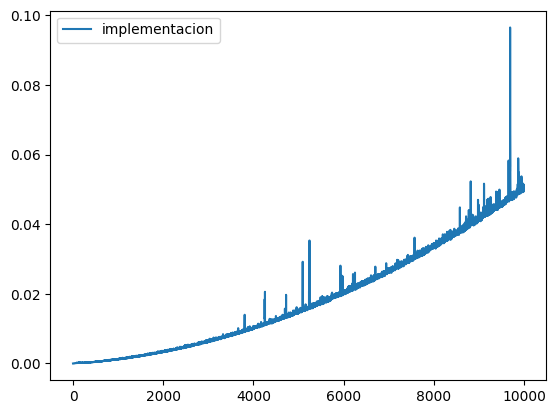

In [54]:
graficar_series(tiempos_de_ejecucion)

Ahora grafiquemos el tiempo teórico O(n log(n))

In [55]:
def tiempo_de_ejecucion_teorico(n):
    return n * numpy.log2(n)

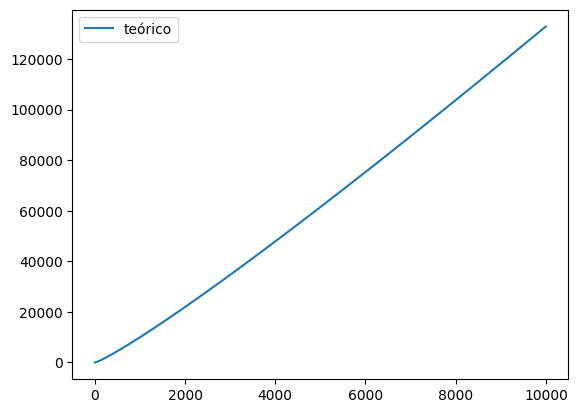

In [56]:
tiempos_de_ejecucion_teoricos = []

for i in range(1, 10000):
    tiempo = tiempo_de_ejecucion_teorico(i)
    tiempos_de_ejecucion_teoricos.append(['teórico', i, tiempo])
    
graficar_series(tiempos_de_ejecucion_teoricos)